# Tarea 2: Modelos de Regresión

Integrantes:
- Fernando Mansilla
- Fernanda Mora

Las aerolíneas enfrentan el desafío de asientos vacíos en sus vuelos debido al fenómeno de no-show, donde algunos pasajeros con reserva no se presentan a abordar. Para mitigar las pérdidas por asientos no ocupados, implementan overbooking, sobre-reservando más asientos asumiendo cierta tasa de no-show. Una mala estimación puede resultar en asientos vacíos o en denegación de embarque a pasajeros. El objetivo de este proyecto es crear un programa para que la aerolínea PANAM estime el no-show en sus vuelos, antes de que estos despeguen. Esto le permitirá implementar overbooking de manera más efectiva, maximizando ingresos al ocupar la mayor cantidad de asientos sin necesidad de denegar embarques.

Se tiene una base de datos que incluye información de 1.000.000 de vuelos de PANAM (2009-2012) con 21 variables, que será utilizada para el entrenamiento del modelo. Luego, se tiene una segunda base de datos para evaluar dicho modelo, esta contiene información de 248.880 vuelos y 20 variables (excluye la variable de noshow ya que corresponde a la variable a predecir).
Las 21 variables corresponden a:
* date: Fecha del vuelo (variable categórica)
* departure_time: Hora programada para el despegue (variable categórica)
* capacity: Capacidad física del avión (# de asientos) (variable numérica continua)
* revenues_usd: Suma de los ingresos totales de un avión (en dólares) (variable numérica continua)
* bookings: Total de reservas en el vuelo al inicio del día de vuelo (variable numérica discreta)
* fligth_number: Número de vuelo (indica la ruta) (variable numérica discreta)
* origin: Aeropuerto de origen (variable categórica)
* destination: Aeropuerto de destino (variable categórica)
* distance: Distancia entre origen y destino (variable numérica discreta)
* noshow: Número de pasajeros que no se presentaron al vuelo (variable numérica continua)
* denied_boarding: Número de pasajeros que no pudieron abordar por vuelo sobre reservado (variable numérica discreta)
* pax_high: Número de pasajeros que compran la tarifa más alta (variable numérica discreta)
* pax_midhigh: Número de pasajeros que compran la segunda tarifa más alta (variable numérica discreta)
* pax_midlow: Número de pasajeros que compran la segunda tarifa más baja (variable numérica discreta)
* pax_low: Número de pasajeros que compran la tarifa más baja (variable numérica discreta)
* pax_freqflyer: Número de pasajeros que canjearon el pasaje con kilómetros PANAM (variable numérica discreta)
* group_bookings: Número de pasajeros que van con un grupo de turismo (variable numérica discreta)
* out_of_stock: Número de días en la historia del vuelo donde no hubo venta por capacidad completada (es un indicador de la demanda del vuelo) (variable numérica discreta)
* dom_cnx: Número de pasajeros que provienen o continúan a una conexión domestica (dentro del mismo país de origen) (variable numérica discreta)
* int_cnx: Número de pasajeros que provienen o continúan a una conexión internacional (variable numérica discreta)
* p2p: Número de pasajeros punto a punto, no conectan ni en origen ni en destino (variable numérica discreta)

Para la evaluación del modelo, se genera un archivo CSV con una sola variable y 248.880 observaciones de noshow. Para esto, se considera Symmetric Mean Absolute Percentage Error (sMAPE) promedio de todas las predecciones del set de evaluación.



## Paso 1: Limpieza de datos y Selección de Variables


In [1]:
#pip install seaborn -> para instalar librerias

In [2]:
# Librerías requeridas:
import pandas as pd
import numpy as np
from plotnine import *
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Visualización preliminar:
df = pd.read_csv("trainData.csv")
print(df.shape) # Cantidad de entidades y atributos (filas,columnas)
df.head() # Estructura del dataframe

(999890, 22)


,Unnamed: 0,date,fligth_number,origin,destination,distance,noshow,denied_boarding,pax_midlow,pax_high,...,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,departure_time,capacity,revenues_usd,bookings
0,389083,2009-11-09,8995,BBA,SCL,1394,9.0,0,94,2,...,22,19,0,1,0,239,10:30:00,174.0,10631.1,240
1,177073,2009-05-23,7061,LIM,TRU,489,0.0,0,100,4,...,25,0,0,19,9,192,19:20:00,174.0,5453.7,220
2,1040357,2011-05-09,8972,SCL,PUQ,2180,4.0,0,7,1,...,2,0,0,0,10,69,09:54:00,218.0,16161.0,79
3,505258,2010-02-12,6039,CGH,CNF,524,13.0,0,54,4,...,4,0,0,26,0,64,21:00:00,174.0,10828.7,90
4,369663,2009-10-24,7713,GPS,GYE,1170,14.0,0,21,88,...,0,88,1,23,3,183,12:40:00,144.0,16721.6,209


En primer lugar, se observa que en realidad existen información de 999.890 vuelos (filas) y efectivamente 21 variables (22 en total porque toma en consideración el id (Unnamed) de cada entidad). 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999890 entries, 0 to 999889
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       999890 non-null  int64  
 1   date             999890 non-null  object 
 2   fligth_number    999890 non-null  int64  
 3   origin           999890 non-null  object 
 4   destination      999890 non-null  object 
 5   distance         999890 non-null  int64  
 6   noshow           999890 non-null  float64
 7   denied_boarding  999890 non-null  int64  
 8   pax_midlow       999890 non-null  int64  
 9   pax_high         999890 non-null  int64  
 10  pax_midhigh      999890 non-null  int64  
 11  pax_low          999890 non-null  int64  
 12  pax_freqflyer    999890 non-null  int64  
 13  group_bookings   999890 non-null  int64  
 14  out_of_stock     999890 non-null  int64  
 15  dom_cnx          999890 non-null  int64  
 16  int_cnx          999890 non-null  int6

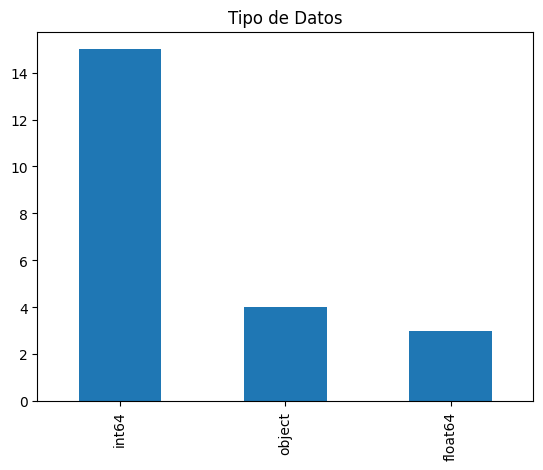

In [4]:
df.info() #Características generales de las variables
df.dtypes.value_counts().plot(kind='bar', title='Tipo de Datos')
plt.show()

In [5]:
cat_variable = df.select_dtypes('object').columns.tolist()
df[cat_variable].head()

,date,origin,destination,departure_time
0,2009-11-09,BBA,SCL,10:30:00
1,2009-05-23,LIM,TRU,19:20:00
2,2011-05-09,SCL,PUQ,09:54:00
3,2010-02-12,CGH,CNF,21:00:00
4,2009-10-24,GPS,GYE,12:40:00


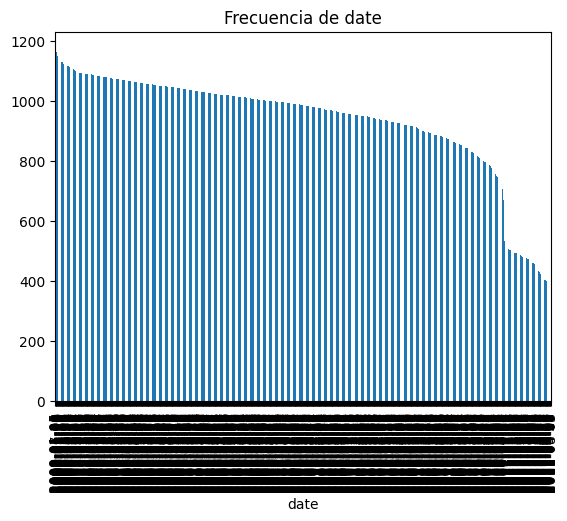

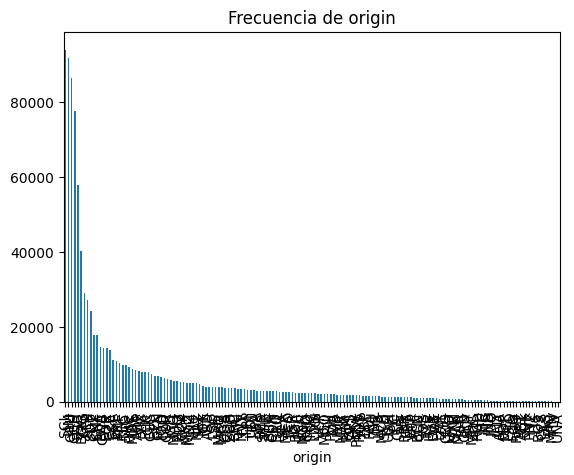

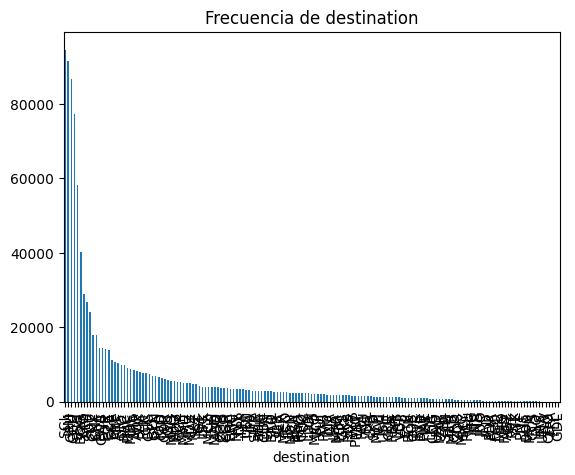

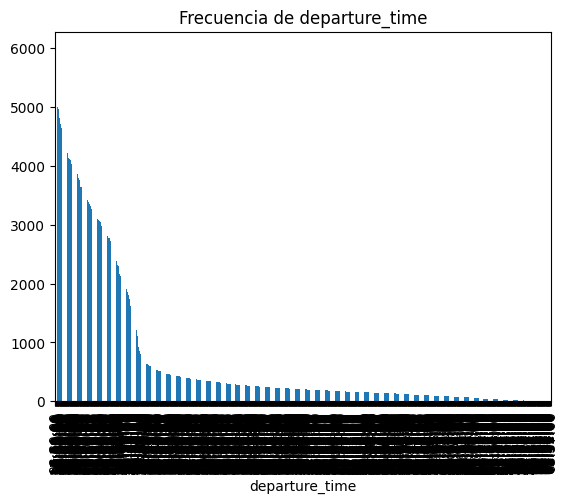

In [6]:
def plot_cat(df, col, title=""):
    df[col].value_counts().plot(kind="bar", title=title)
    plt.show()

for col in cat_variable:
    plot_cat(df, col, title=f"Frecuencia de {col}")

Se observa que efectivamente existen 4 variables categóricas (date, departure_time, origin, destination), 3 variables numéricas continuas (noshow, capacity, revenues_usd) y las demás variables numéricas discretas. 
El gráfico de date_time y departure es difícil de interpretar, pero se observa que la frecuencia de vuelos durante el día es distinta dependiendo de la hora, se observa que la mayoría de los vuelos se realizan en las primeras horas del día y luego va drecenciendo esta frecuencia. En el caso de date_time, es necesario observar los datos de otra forma para poder realizar un análisis correcto.
Por otro lado, hay información faltante para la variable departure_time, en específico, 1418 valores faltantes. Dado que esto representa el 0.14% del total de datos, es una cantidad despreciable, por lo que se decide eliminarlos.
También es importante mencionar, que los gráficos de origin y destination son prácticamente idénticos, por lo que se puede concluir que se debe a que los vuelos ida-vuelta.

Además se eliminarán posibles filas que estén duplicadas en el set de datos.


In [7]:
df.dropna(inplace=True) 
df.drop_duplicates(inplace = True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998472 entries, 0 to 999889
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       998472 non-null  int64  
 1   date             998472 non-null  object 
 2   fligth_number    998472 non-null  int64  
 3   origin           998472 non-null  object 
 4   destination      998472 non-null  object 
 5   distance         998472 non-null  int64  
 6   noshow           998472 non-null  float64
 7   denied_boarding  998472 non-null  int64  
 8   pax_midlow       998472 non-null  int64  
 9   pax_high         998472 non-null  int64  
 10  pax_midhigh      998472 non-null  int64  
 11  pax_low          998472 non-null  int64  
 12  pax_freqflyer    998472 non-null  int64  
 13  group_bookings   998472 non-null  int64  
 14  out_of_stock     998472 non-null  int64  
 15  dom_cnx          998472 non-null  int64  
 16  int_cnx          998472 non-null  int64  
 

Para un mejor manejo de los datos y en realizar un análisis temporal en caso de ser necesario, se transformarán las variables "date" a tipo "datetime".

In [8]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df.head()

,Unnamed: 0,date,fligth_number,origin,destination,distance,noshow,denied_boarding,pax_midlow,pax_high,...,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,departure_time,capacity,revenues_usd,bookings
0,389083,2009-11-09,8995,BBA,SCL,1394,9.0,0,94,2,...,22,19,0,1,0,239,10:30:00,174.0,10631.1,240
1,177073,2009-05-23,7061,LIM,TRU,489,0.0,0,100,4,...,25,0,0,19,9,192,19:20:00,174.0,5453.7,220
2,1040357,2011-05-09,8972,SCL,PUQ,2180,4.0,0,7,1,...,2,0,0,0,10,69,09:54:00,218.0,16161.0,79
3,505258,2010-02-12,6039,CGH,CNF,524,13.0,0,54,4,...,4,0,0,26,0,64,21:00:00,174.0,10828.7,90
4,369663,2009-10-24,7713,GPS,GYE,1170,14.0,0,21,88,...,0,88,1,23,3,183,12:40:00,144.0,16721.6,209


Se sabe que la variable fligth_number esta directamente relacionada con las variables origin y destination, dado que la primera variable indica dicha ruta. Por lo tanto, se espera que todos los vuelos que tienen un origen A y destino B, tengan un number_fligth x igual.

In [9]:
grouped = df.groupby(['origin', 'destination', 'fligth_number']).size().reset_index(name='count') # Agrupa los vuelos por ruta (origen-destino) y número de vuelo, y cuenta cuántos vuelos hay para cada grupo
consistent_flights = grouped[grouped['count'] != 1] # Filtra y deja solo los vuelos consistentes
df = df.merge(consistent_flights, on=['origin', 'destination', 'fligth_number'], how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995925 entries, 0 to 995924
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       995925 non-null  int64         
 1   date             995925 non-null  datetime64[ns]
 2   fligth_number    995925 non-null  int64         
 3   origin           995925 non-null  object        
 4   destination      995925 non-null  object        
 5   distance         995925 non-null  int64         
 6   noshow           995925 non-null  float64       
 7   denied_boarding  995925 non-null  int64         
 8   pax_midlow       995925 non-null  int64         
 9   pax_high         995925 non-null  int64         
 10  pax_midhigh      995925 non-null  int64         
 11  pax_low          995925 non-null  int64         
 12  pax_freqflyer    995925 non-null  int64         
 13  group_bookings   995925 non-null  int64         
 14  out_of_stock     995

Se tienen 2547 entidades con información incosistente entre el number_fligth y las otras dos variables. Estos 2547 datos representan el 0.25% de la base de datos actual, al ser un porcentaje despreciable, se decide eliminarlos.

Por otro lado, se busca cierta certeza acerca de cuantos pasajes en total se vendieron para cada vuelo, se supone que la variable booking entrega esta información, por lo tanto la diferencia de la suma de cada tipo de pasaje vendido y bookings se espera que sea 0.

In [10]:
df.loc[df.index, 'total_pasaje'] = df['pax_freqflyer'] + df['pax_high'] + df['pax_low'] + df['pax_midhigh'] + df['pax_midlow']
count = len(df[df['total_pasaje'] - df['bookings'] != 0])
print(count)

0


Ahora bien, en el caso de que las ventas de pasajes sea mayor a la capacidad del avión, se espera que los pasajeros que no viajan por sobrecupo sea igual al total de venta de pasajes menos la suma de la capacidad y los pasajeros que no se presentan.
Por otro lado, en el caso de no vender la cantidad de pasajes equivalentes a la capacidad del avión, a ningún pasajero se le niega el cupo.

In [11]:
count1 = len(df[(df['denied_boarding'] != (df['bookings'] - df['capacity'] - df['noshow'])) & (df['bookings'] > df['capacity'])])
count1
count2 = len(df[(df['bookings'] <= (df['capacity'])) & (df['denied_boarding'] != 0)])
count1, count2

(354155, 8632)

Se observan  datos inconsistentes, lo que representa al 36.9% de los datos totales, por lo que se decide eliminarlos.

In [12]:
df = df.drop(df[(df['denied_boarding'] != (df['bookings'] - df['capacity'] - df['noshow'])) & (df['bookings'] > df['capacity'])].index)
df = df.drop(df[(df['bookings'] <= (df['capacity'])) & (df['denied_boarding'] != 0)].index)

Una vez hecha la limpieza preliminar de los datos, se procede a analizar cada variable y datos a profundidad.

In [13]:
df.describe()

,Unnamed: 0,date,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,...,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings,count,total_pasaje
count,6.331380e+05,633138,633138.000000,633138.000000,633138.000000,633138.000000,633138.000000,633138.000000,633138.000000,633138.000000,...,633138.000000,633138.000000,633138.000000,633138.000000,633138.000000,633138.000000,633138.000000,633138.000000,633138.000000,633138.000000
mean,7.126745e+05,2010-08-07 13:10:06.066924032,6174.933356,1232.598424,5.903203,0.000246,56.077773,3.852489,6.419529,41.173967,...,3.248598,0.076568,26.111634,20.628438,76.397443,175.875341,12987.319090,123.137515,419.101798,123.137515
min,1.000000e+00,2009-01-02 00:00:00,12.000000,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,-34733.800000,1.000000,2.000000,1.000000
25%,3.805125e+05,2009-11-02 00:00:00,5356.000000,491.000000,3.000000,0.000000,25.000000,0.000000,0.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,43.000000,150.000000,5785.200000,94.000000,208.000000,94.000000
50%,7.286505e+05,2010-08-23 00:00:00,6014.000000,855.000000,5.000000,0.000000,58.000000,1.000000,2.000000,38.000000,...,0.000000,0.000000,13.000000,4.000000,75.000000,174.000000,8869.800000,122.000000,446.000000,122.000000
75%,1.069818e+06,2011-06-03 00:00:00,7224.000000,1336.000000,8.000000,0.000000,81.000000,4.000000,8.000000,59.000000,...,0.000000,0.000000,42.000000,22.000000,107.000000,174.000000,14083.800000,150.000000,602.000000,150.000000
max,1.350319e+06,2012-01-08 00:00:00,9264.000000,11380.000000,271.000000,10.000000,297.000000,195.000000,230.000000,231.000000,...,214.000000,1.000000,219.000000,315.000000,321.000000,451.000000,302180.100000,395.000000,884.000000,395.000000
std,3.941615e+05,NaN,2001.885516,1397.299020,5.096223,0.033534,37.770650,7.425392,10.817504,32.931805,...,11.178755,0.265905,31.770761,35.725334,44.695620,30.751151,16137.978398,42.994101,242.032311,42.994101


Primero, el fligth_number al ser un número que sólo representa la ruta, es decir, su distancia no tiene significado, lo único que se podría intuir es que se han realizado nuevas rutas a lo largo de los años. Se observan máximos interesantes dentro de la base de datos, por ejemplo, en el caso de distance el máximo valor es de 11380 [km] y el mínimo 83 [km]. 
Por otro lado, noshow tiene como máximo 271 pasajeros, lo que sería casi 1.5 de la capacidad promedio de un avión, siendo algo inusual si se observa las proporciones de los cuartiles. En el caso de denied_boarding, también se observa como un valor extraño el máximo 10 ya que en promedio no se deniega el asiento por sobrecupo. 
En el caso de compra de pasajes, parece comportarse mas o menos de forma normal, ya que se espera que una menor cantidad de personas compren los pasajes con valores más altos, y que se prefieran los pasajes con precios más bajos.

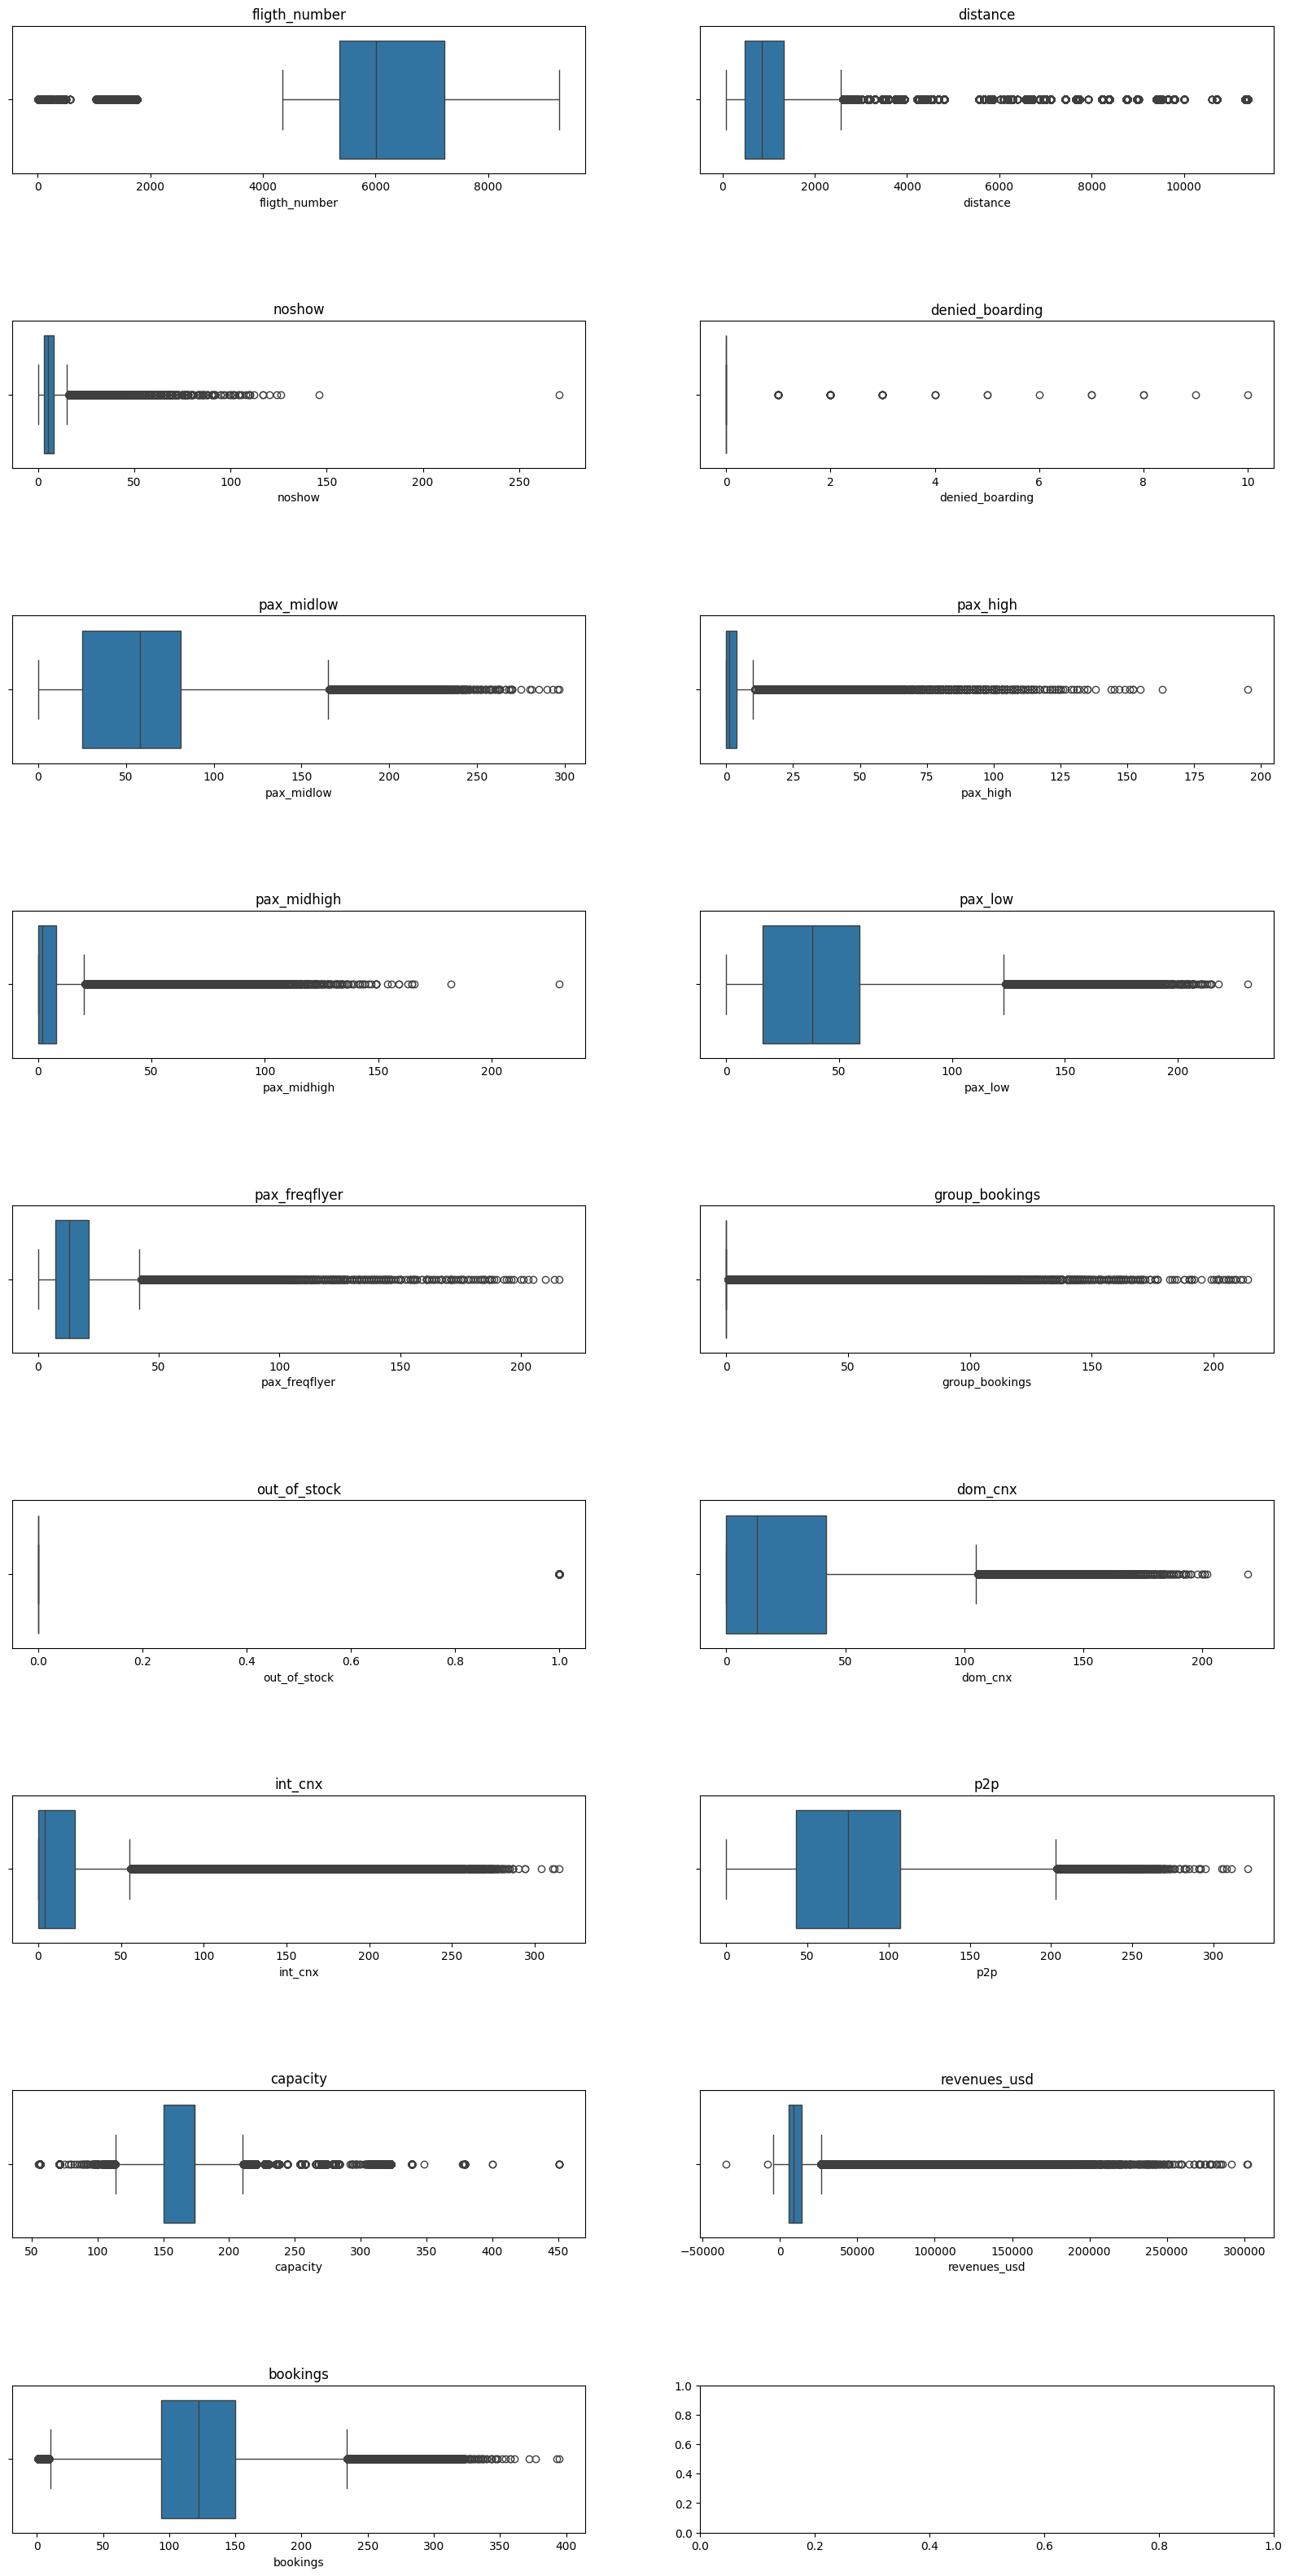

In [14]:
cols_num = ['fligth_number', 'distance', 'noshow', 'denied_boarding', 'pax_midlow', 'pax_high', 'pax_midhigh', 'pax_low', 'pax_freqflyer', 'group_bookings', 'out_of_stock', 'dom_cnx', 'int_cnx', 'p2p', 'capacity', 'revenues_usd', 'bookings']

fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(20, 40))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i // 2, i % 2])
    ax[i // 2, i % 2].set_title(col)

plt.show()

Dentro de los gráficos más interesantes, se observa que en el caso de fligth_number existen vuelos más usuales que otros. Por otro lado, en distance existen distancias muy grandes, mayores a los 10.000 [km], por lo que se analizarán algunos datos respecto a esto.
En el caso de denied_boarding, se analizarán los casos donde se denegaron asientos por sobrecupo. Las variables de tarifas se comportan de una forma esperado, ya que en promedio se compran más los pasajes con menor costo. En el caso de out_stock, esta al tener dos valores no entrega mayor información el gráfico de cajas. Las variables sobre cómo suben los pasajeros (conexiones) es necesarias analizarlas a mayor profundidad para criticar si entregan información relevante al problema.
La capacidad, parece existir aviones con una pequeña capacidad (50-100) o con una gran capacidad (350-450) pero en promedio es un poco más de 150 pasajeros. Los ingresos parecen ser más o menos similares con algunos eventos atípicos donde entra mucho más dinero a la empresa. Por último, las reservas en promedio son 125 y valores atípicos que llegan hasta 400 reservas.


In [15]:
df[df['distance']>10000]
df[df['denied_boarding']>0]


,Unnamed: 0,date,fligth_number,origin,destination,distance,noshow,denied_boarding,pax_midlow,pax_high,...,out_of_stock,dom_cnx,int_cnx,p2p,departure_time,capacity,revenues_usd,bookings,count,total_pasaje
6747,423215,2009-12-06,1153,GRU,MEX,7427,3.0,1,100,5,...,0,0,84,107,23:30:00,187.0,88715.0,191,760,191.0
19701,213054,2009-06-22,5551,CGH,PMW,1494,2.0,1,91,6,...,0,86,0,91,21:55:00,174.0,9179.1,177,502,177.0
54548,280921,2009-08-14,7255,CUZ,LIM,586,2.0,2,66,40,...,1,3,68,107,07:45:00,174.0,12380.8,178,775,178.0
89072,564896,2010-04-07,6791,SCL,LIM,2459,15.0,8,124,0,...,1,0,142,49,04:50:00,168.0,18056.3,191,391,191.0
95771,319890,2009-09-14,5561,CGH,BSB,873,3.0,2,68,7,...,1,52,0,127,09:35:00,174.0,18914.2,179,708,179.0
106384,428272,2009-12-10,1185,GRU,JFK,7658,1.0,1,110,7,...,0,0,109,80,22:55:00,187.0,62492.9,189,659,189.0
157050,488525,2010-01-29,8804,SCL,AEP,1146,0.0,3,87,16,...,1,0,69,102,17:15:00,168.0,23473.7,171,843,171.0
162096,394641,2009-11-13,6132,BAQ,BOG,687,4.0,3,22,69,...,1,103,18,60,16:49:00,174.0,14828.9,181,242,181.0
164922,122289,2009-04-08,5691,GRU,FOR,2345,2.0,2,108,9,...,1,57,37,84,09:20:00,174.0,15817.2,178,585,178.0
167049,95127,2009-03-16,1255,GRU,AEP,1693,5.0,3,81,12,...,1,0,88,64,11:10:00,144.0,19241.0,152,599,152.0


Se observa que SCL-MAD es una de las mayores distancias, al investigar, la distancia entre Santiago de Chile y Madrid España es de 10.714 [km] por lo que estos datos "atípicos" están correctos.  Por otro lado, los pasajeros denegados en general no son muchos y esto es porque en general, no se venden gran cantidad de pasajes para el sobrecupo.

Antes de seguir con el análisis, se eliminan las variables Unnamed:0  count y Total_pasaje para hacer una limpieza visual y poder analizar mejor los gráficos.

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'fligth_number'}>,
        <Axes: title={'center': 'distance'}>,
        <Axes: title={'center': 'noshow'}>],
       [<Axes: title={'center': 'denied_boarding'}>,
        <Axes: title={'center': 'pax_midlow'}>,
        <Axes: title={'center': 'pax_high'}>,
        <Axes: title={'center': 'pax_midhigh'}>],
       [<Axes: title={'center': 'pax_low'}>,
        <Axes: title={'center': 'pax_freqflyer'}>,
        <Axes: title={'center': 'group_bookings'}>,
        <Axes: title={'center': 'out_of_stock'}>],
       [<Axes: title={'center': 'dom_cnx'}>,
        <Axes: title={'center': 'int_cnx'}>,
        <Axes: title={'center': 'p2p'}>,
        <Axes: title={'center': 'capacity'}>],
       [<Axes: title={'center': 'revenues_usd'}>,
        <Axes: title={'center': 'bookings'}>, <Axes: >, <Axes: >]],
      dtype=object)

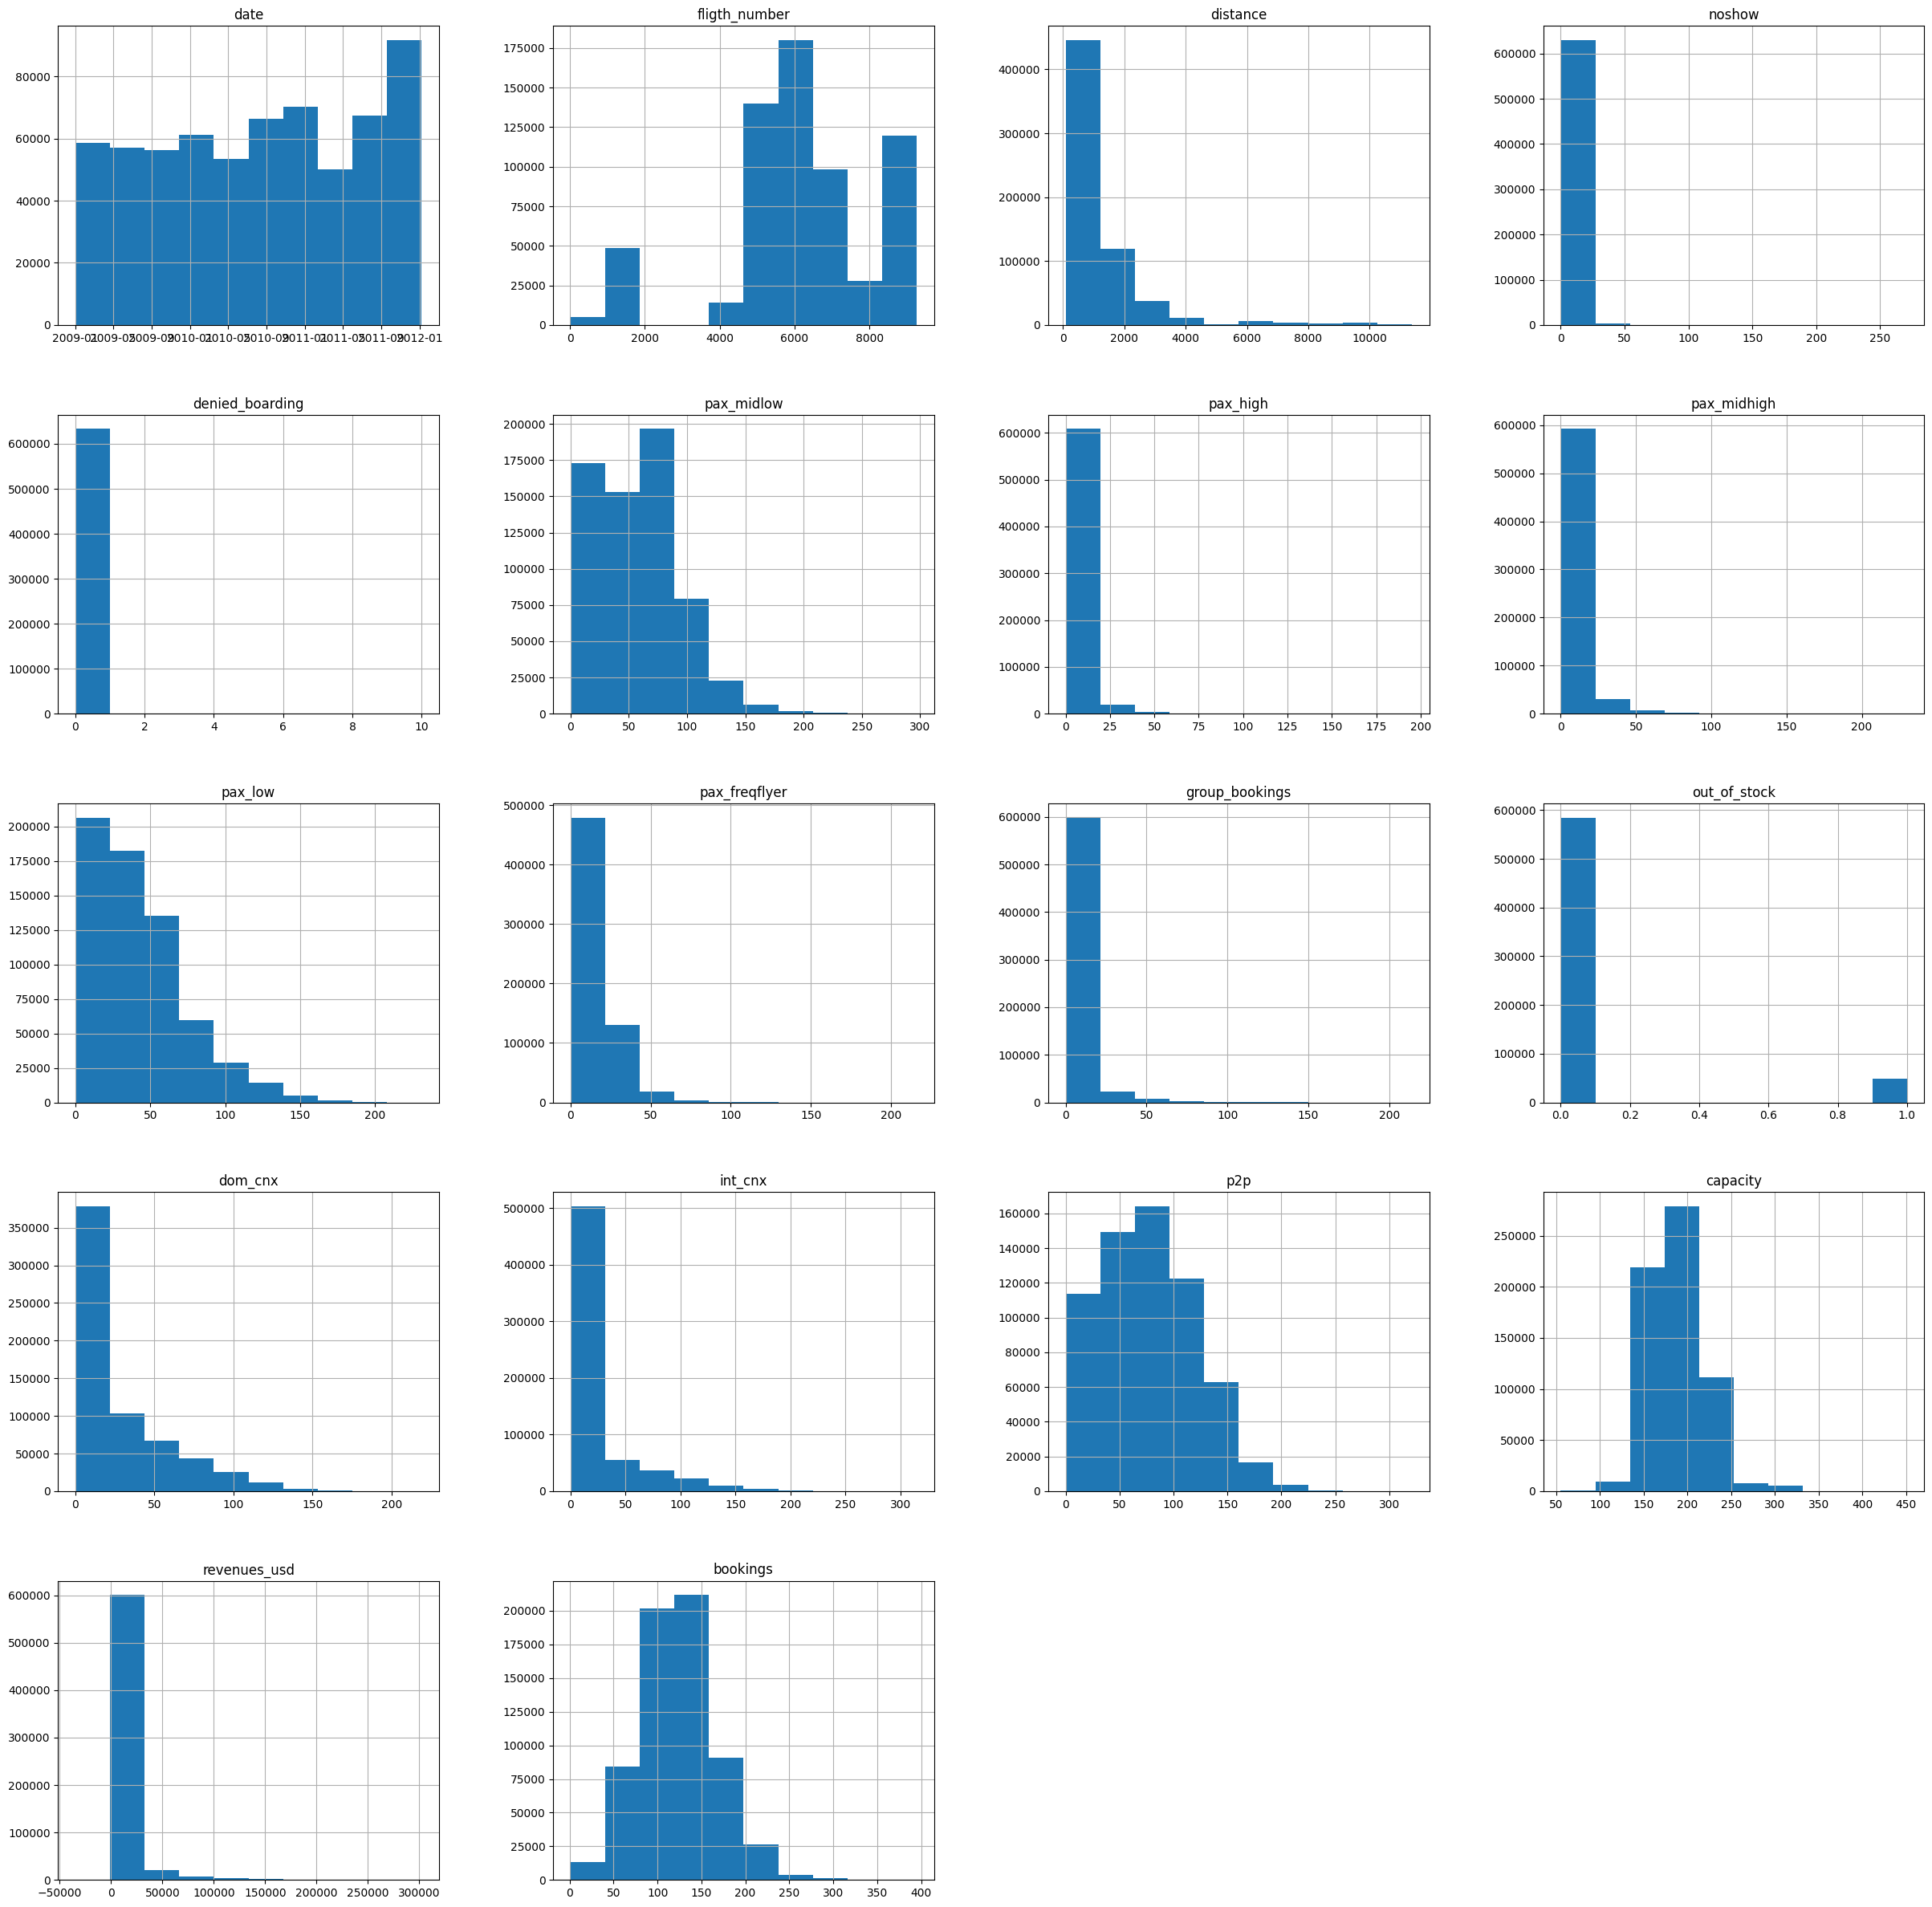

In [16]:
df = df.drop(columns=['Unnamed: 0','count', 'total_pasaje'])
df.hist(figsize=(30,30))

Respecto a los gráficos de barras correspondientes a las variables numéricas, se observa primero, en el gráfico de date_time, que los vuelos han ido en aumento sobre todo en el último tiempo del periodo que se está analizando. Existe una baja en 2011, lo que puede entenderser por algún hecho histórico en particular como la Gran Recesión de Estados Unidos ocurrido durante el año anterior. Por otro lado, se observa que la variable capacity y bookings se comportan de forma normal al igual que las tarifas, pero estas últimas se diferencian en que solo presentan la cola derecha de la distribución, esto puede ser porque los pasajeros eligen los "mejores pasajes" según precio.
También los gráficos de interconexiones, en particular p2p se distribuye normalmente, y esto puede ser porque los vuelos más económicos, no son vuelos directos.

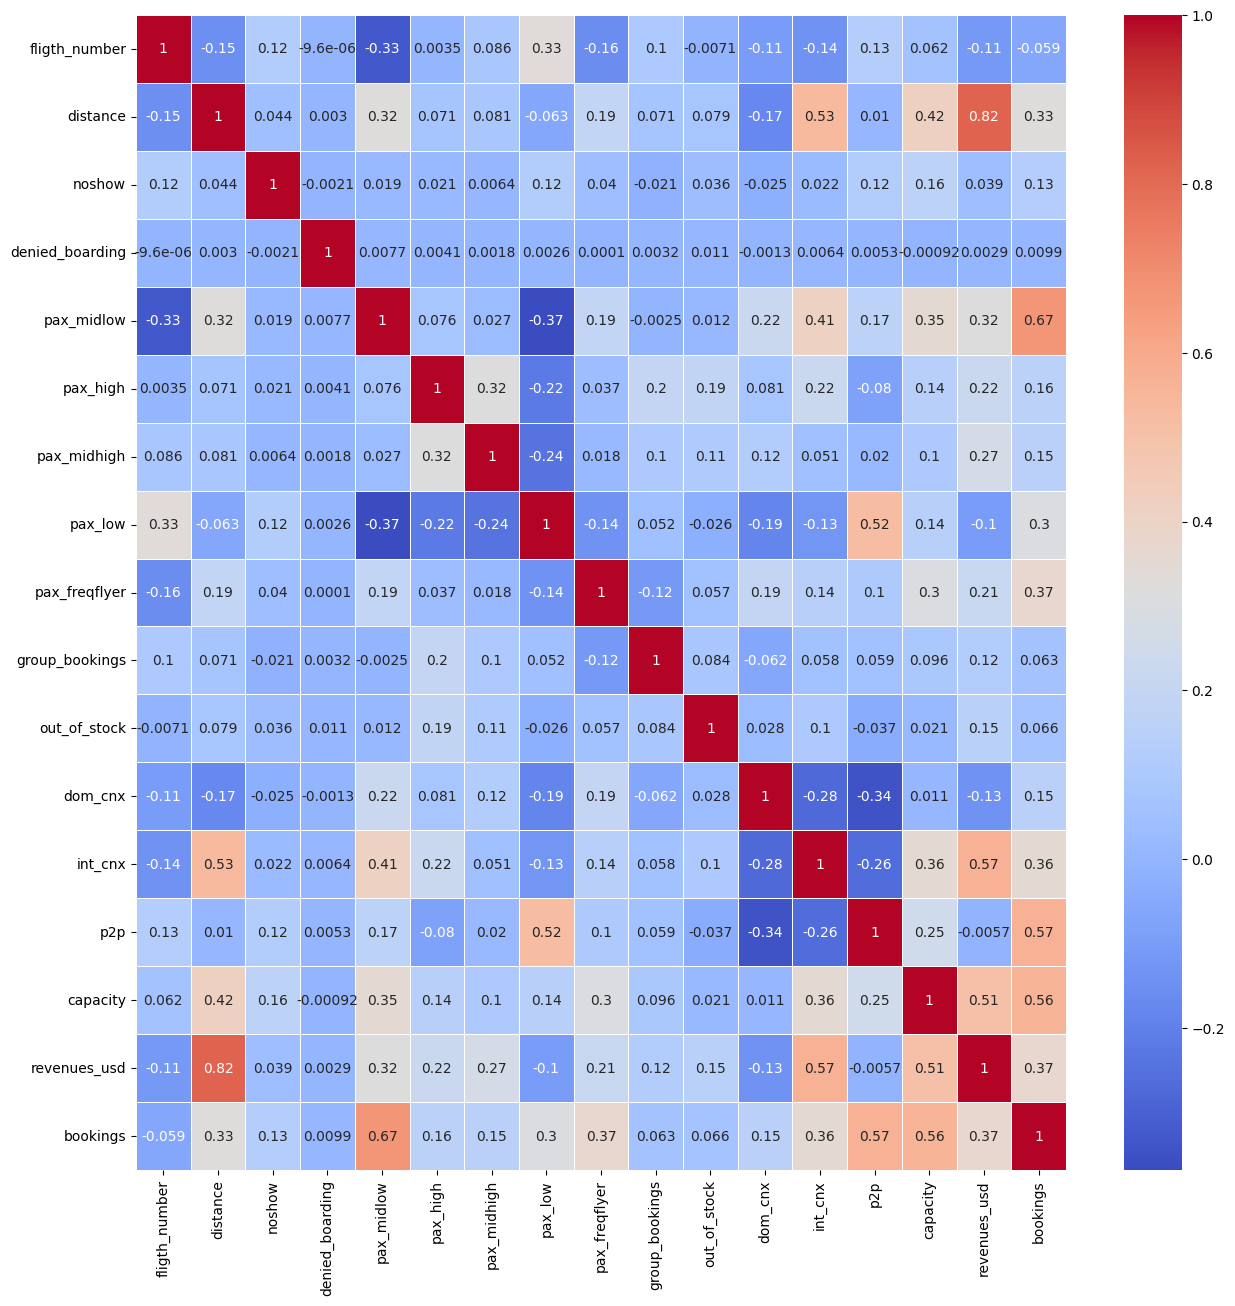

In [17]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

Del mapa de calor se observa que la distancia del vuelo y las ganancias por ello son positivamente correlacionadas (0.82), también las segundas tarifas más bajas presentan una correlación con la venta de pasajes, al igual que los vuelos que tienen conexiones entre su origen y destino, se ven relación con el valor del pasaje. En general, todas las variables que tienen una correlación (+)(-) 0.45-0.5 representan una posible relación entre variables involucradas.

Para aplicar el mapa de calor no es necesario realizar un paso previo para estandarizar.

Ahora, acerca de la variable de interés noshow, se observa que no tiene correlación significativa con ninguna de las variables. 


## Selección de variables:

Para este problema entonces, se decide eliminar:
* Unnamed:0 : No tiene relación con el problema abordado.
* Origin: Esta variable está directamente relacionada con fligth_number.
* Destination: Esta variable está directamente relacionada con fligth_number.
* date: Por simplicidad del problema, no se utiliza variables de tiempo.
* departure_time: Por simplicidad del problema, no se utiliza variables de tiempo.
* revenues_usd: El problema no esta relacionado directamente económico (ganancias -pérdidas en término de dinero)
* distance: Esta variable esta directamente relacionada con fligth_number.
* denied_boarding: Esta variable está directamente relacionada con capacity, bookings y noshow.
* pax_high, pax_midhigh, pax_low, pax_freqflyer: No entregan información relevante para el problema.
* group_bookings:  No entrega información relevante para el problema.
* dom_cnx, int_cnx: No presentan ninguna correlación relevante.


Se trabaja entonces, con las variables: fligth_number, bookings, capacity, pax_low, pax_midlow, out_of_stock, p2p y noshow, dado que estas presentan información interesante de la base de datos. 

In [18]:
df = df[['fligth_number', 'bookings', 'capacity', 'pax_low', 'p2p','pax_midlow' ,'out_of_stock','noshow']]
df

,fligth_number,bookings,capacity,pax_low,p2p,pax_midlow,out_of_stock,noshow
1,8995,97,174.0,83,92,1,0,4.0
2,8995,171,174.0,68,170,68,0,10.0
4,8995,143,174.0,39,101,46,0,7.0
5,8995,145,174.0,63,141,56,0,5.0
6,8995,114,174.0,98,109,0,0,3.0
...,...,...,...,...,...,...,...,...
995920,252,132,220.0,0,74,109,0,8.0
995921,252,156,220.0,0,82,144,0,2.0
995922,252,119,220.0,0,40,79,0,11.0
995923,6771,52,220.0,0,0,2,0,9.0


## Paso 2: Búsqueda de hiperparámetros y aplicación de kNN para los datos 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer  # Como imp lementar el SMAPE...
from sklearn.preprocessing import StandardScaler

X = df.drop(columns="noshow")
y = df.noshow

RANDOM_STATE = 42
TEST_SIZE = 0.2

scaler = StandardScaler()



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)
X_train= scaler.fit_transform(X_train)
# Transformar los datos de prueba utilizando el mismo scaler
X_test= scaler.transform(X_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape



((506510, 7), (506510,), (126628, 7), (126628,))

Primero, se separan los datos en conjunto de entrenamiento y prueba con train_test_split. Se escalan los datos de entrenamiento con fit_transform. Esto aprende los parámetros de escalado (media y desviación estándar) en el conjunto de entrenamiento. De esta manera tanto entrenamiento como prueba quedan escalados con la misma transformación, dejando las variables centradas en 0 y con varianza 1.

Por último, el set de entrenamiento está conformado por 506.510 datos y el set de prueba de 126.628 datos respectivamente.

Ahora, se define la función de Symmetric mean absolute percentage error smape que será utilizado para definir los hiperparámetros óptimos posteriormente.


In [20]:
def smape(y_true, y_pred):
    num = np.abs(y_true - y_pred)
    den = np.abs(y_true) + np.abs(y_pred)
    return 100 * np.nan_to_num((num / den).mean())

Se genera un modelo simple, donde toma la media como predictor de los datos, siendo este la "peor estimación de los datos", para así comparar el rendimiento del modelo kNN y árboles de decisión, y cuánto mejora en relación con este modelo simple.

In [21]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

dm = DummyRegressor(strategy="mean")
dm.fit(X_train, y_train)
y_pred_dm = dm.predict(X_test)
smape(y_test, y_pred_dm)

32.97468876929972

Se observa que este modelo presenta un error del 32.97, es decir, que en promedio las predicciones del modelo de referencia (que simplemente predice la media) difieren en aproximadamente un 32.97% de las etiquetas reales en el conjunto de prueba. Cualquier modelo que obtenga un smape menor a 32.97%, tendrá un mejor rendimiento que este modelo.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer

smape_metric = make_scorer(smape, greater_is_better=False)

Se realiza una búsqueda exhaustiva de hiperparámetros para encontrar la configuración óptima del modelo KNN en función de diferentes métricas de evaluación y luego evalúa el rendimiento del modelo ajustado en un conjunto de prueba. Esto es útil para determinar cuál de las métricas es la más adecuada para tu problema y cómo se comporta el modelo con diferentes configuraciones de hiperparámetros. Cabe destacar que en primer lugar se realizó una búsqueda n_neighbors entre valores de 1 y 21, observando que la curva de smape comenzaba a decrecer lentamente alrededor del valor de 10 y luego, la mejora del error era minima, por lo que se acota el intervalo de búsqueda en conjunto a los demás hiperparámetros.

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error

param_grid = {
    'n_neighbors': [5,9,10,13,15],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Tipo de peso
    'p': [1, 2]  # Parámetro de distancia (1 para distancia de Manhattan, 2 para distancia euclidiana)
}

knn = KNeighborsRegressor()

smape_metric = make_scorer(smape, greater_is_better=False)
grid_search_smape = GridSearchCV(knn, param_grid, cv=5, scoring=smape_metric)
grid_search_smape.fit(X_train, y_train)

best_n_neighbors_smape = grid_search_smape.best_params_['n_neighbors']
best_weights_smape = grid_search_smape.best_params_['weights']
best_p_smape = grid_search_smape.best_params_['p']

print("Mejor número de vecinos para SMAPE:", best_n_neighbors_smape)
print("Mejor tipo de peso para SMAPE:", best_weights_smape)
print("Mejor parámetro de distancia para SMAPE:", best_p_smape)

best_knn_smape = grid_search_smape.best_estimator_

y_pred_smape = best_knn_smape.predict(X_test)

smape_value = smape(y_test, y_pred_smape)
print("SMAPE en el conjunto de prueba:", smape_value)

grid_search_mse = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_mse.fit(X_train, y_train)

best_n_neighbors_mse = grid_search_mse.best_params_['n_neighbors']
best_weights_mse = grid_search_mse.best_params_['weights']
best_p_mse = grid_search_mse.best_params_['p']

print("Mejor número de vecinos para MSE:", best_n_neighbors_mse)
print("Mejor tipo de peso para MSE:", best_weights_mse)
print("Mejor parámetro de distancia para MSE:", best_p_mse)

best_knn_mse = grid_search_mse.best_estimator_

y_pred_mse = best_knn_mse.predict(X_test)

mse = mean_squared_error(y_test, y_pred_mse)
print("MSE en el conjunto de prueba:", mse)

grid_search_r2 = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search_r2.fit(X_train, y_train)

best_n_neighbors_r2 = grid_search_r2.best_params_['n_neighbors']
best_weights_r2 = grid_search_r2.best_params_['weights']
best_p_r2 = grid_search_r2.best_params_['p']

print("Mejor número de vecinos para R^2:", best_n_neighbors_r2)
print("Mejor tipo de peso para R^2:", best_weights_r2)
print("Mejor parámetro de distancia para R^2:", best_p_r2)

best_knn_r2 = grid_search_r2.best_estimator_

y_pred_r2 = best_knn_r2.predict(X_test)

r2 = r2_score(y_test, y_pred_r2)
print("R^2 en el conjunto de prueba:", r2)

grid_search_mae = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_mae.fit(X_train, y_train)

best_n_neighbors_mae = grid_search_mae.best_params_['n_neighbors']
best_weights_mae = grid_search_mae.best_params_['weights']
best_p_mae = grid_search_mae.best_params_['p']

print("Mejor número de vecinos para MAE:", best_n_neighbors_mae)
print("Mejor tipo de peso para MAE:", best_weights_mae)
print("Mejor parámetro de distancia para MAE:", best_p_mae)

best_knn_mae = grid_search_mae.best_estimator_

y_pred_mae = best_knn_mae.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_mae)
print("MAE en el conjunto de prueba:", mae)


Mejor número de vecinos para SMAPE: 15
Mejor tipo de peso para SMAPE: uniform
Mejor parámetro de distancia para SMAPE: 1
SMAPE en el conjunto de prueba: 32.157716635455344
Mejor número de vecinos para MSE: 15
Mejor tipo de peso para MSE: uniform
Mejor parámetro de distancia para MSE: 1
MSE en el conjunto de prueba: 24.553750057034954
Mejor número de vecinos para R^2: 15
Mejor tipo de peso para R^2: uniform
Mejor parámetro de distancia para R^2: 1
R^2 en el conjunto de prueba: 0.06843960665620041
Mejor número de vecinos para MAE: 15
Mejor tipo de peso para MAE: uniform
Mejor parámetro de distancia para MAE: 1
MAE en el conjunto de prueba: 3.4168372450537534


Se observa que los hiperparámetros encontrados por el modelo disminuyen de forma despreciable el error que se obtiene con el modelo simple.
Los siguientes gráficos fueron generados con el rango anteriormente mencionado, donde se probaron n_neighbords entre 1 y 21. Como se mencionó anteriomente, los errores comienzan a estabilizarse cuando el k toma el valor de 10 donde se minimizan en mayor medida los errores calculados.

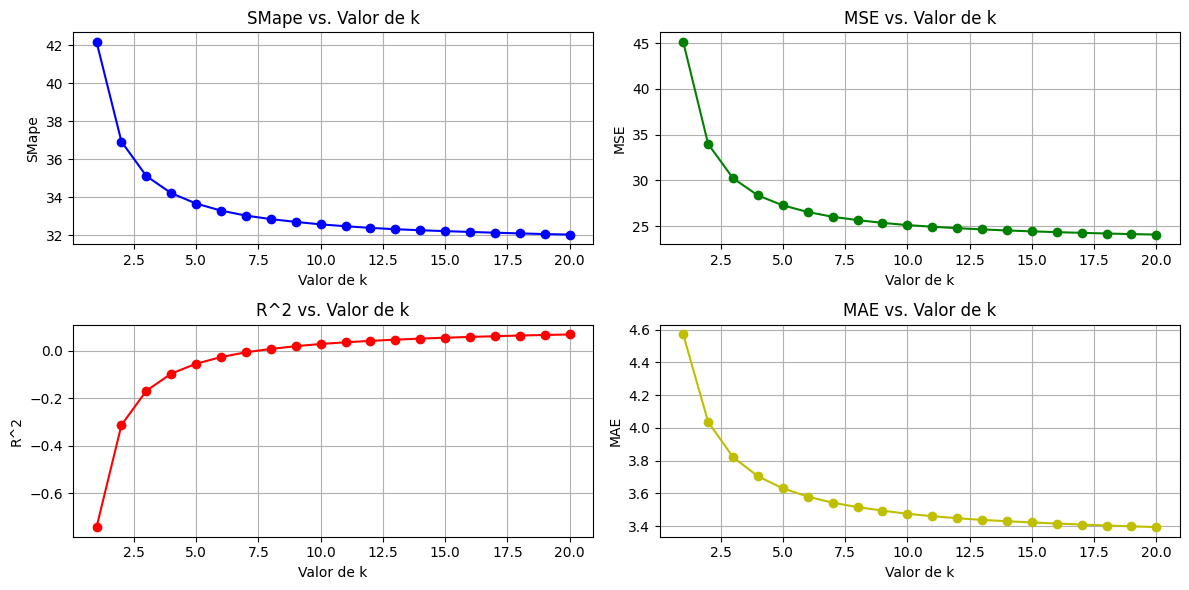

In [ ]:
smape_scores = [-score for score in grid_search_smape.cv_results_['mean_test_score']]
mse_scores = [-score for score in grid_search_mse.cv_results_['mean_test_score']]
r2_scores = grid_search_r2.cv_results_['mean_test_score']
mae_scores = [-score for score in grid_search_mae.cv_results_['mean_test_score']]

k_values = param_grid['n_neighbors']

plt.figure(figsize=(12, 6))

plt.subplot(221)
plt.plot(k_values, smape_scores, marker='o', linestyle='-', label='SMape', color='b')
plt.title('SMape vs. Valor de k')
plt.xlabel('Valor de k')
plt.ylabel('SMape')
plt.grid(True)

plt.subplot(222)
plt.plot(k_values, mse_scores, marker='o', linestyle='-', label='MSE', color='g')
plt.title('MSE vs. Valor de k')
plt.xlabel('Valor de k')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(223)
plt.plot(k_values, r2_scores, marker='o', linestyle='-', label='R^2', color='r')
plt.title('R^2 vs. Valor de k')
plt.xlabel('Valor de k')
plt.ylabel('R^2')
plt.grid(True)

plt.subplot(224)
plt.plot(k_values, mae_scores, marker='o', linestyle='-', label='MAE', color='y')
plt.title('MAE vs. Valor de k')
plt.xlabel('Valor de k')
plt.ylabel('MAE')
plt.grid(True)

plt.tight_layout()
plt.show()


In [34]:
# Crear un modelo KNN con los mejores hiperparámetros para SMAPE
best_k_smape = 15
best_weights_smape = 'uniform'
best_p_smape = 1

knn_reg_smape = KNeighborsRegressor(n_neighbors=best_k_smape, weights=best_weights_smape, p=best_p_smape)
knn_reg_smape.fit(X_train, y_train)
y_pred_smape = knn_reg_smape.predict(X_test)

smape_value = smape(y_test, y_pred_smape)
print(f"SMAPE en el conjunto de prueba con mejores hiperparámetros para SMAPE: {smape_value}")

# Crear un modelo KNN con los mejores hiperparámetros para MSE
best_k_mse = 15
best_weights_mse = 'uniform'
best_p_mse = 1

knn_reg_mse = KNeighborsRegressor(n_neighbors=best_k_mse, weights=best_weights_mse, p=best_p_mse)
knn_reg_mse.fit(X_train, y_train)
y_pred_mse = knn_reg_mse.predict(X_test)

mse = mean_squared_error(y_test, y_pred_mse)
print(f"MSE en el conjunto de prueba con mejores hiperparámetros para MSE: {mse}")

# Crear un modelo KNN con los mejores hiperparámetros para R^2
best_k_r2 = 15
best_weights_r2 = 'uniform'
best_p_r2 = 1

knn_reg_r2 = KNeighborsRegressor(n_neighbors=best_k_r2, weights=best_weights_r2, p=best_p_r2)
knn_reg_r2.fit(X_train, y_train)
y_pred_r2 = knn_reg_r2.predict(X_test)

r2 = r2_score(y_test, y_pred_r2)
print(f"R^2 en el conjunto de prueba con mejores hiperparámetros para R^2: {r2}")

# Crear un modelo KNN con los mejores hiperparámetros para MAE
best_k_mae = 15
best_weights_mae = 'uniform'
best_p_mae = 1

knn_reg_mae = KNeighborsRegressor(n_neighbors=best_k_mae, weights=best_weights_mae, p=best_p_mae)
knn_reg_mae.fit(X_train, y_train)
y_pred_mae = knn_reg_mae.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_mae)
print(f"MAE en el conjunto de prueba con mejores hiperparámetros para MAE: {mae}")


SMAPE en el conjunto de prueba con mejores hiperparámetros para SMAPE: 32.157716635455344
MSE en el conjunto de prueba con mejores hiperparámetros para MSE: 24.553750057034954
R^2 en el conjunto de prueba con mejores hiperparámetros para R^2: 0.06843960665620041
MAE en el conjunto de prueba con mejores hiperparámetros para MAE: 3.4168372450537534


## Paso 3: Búsqueda de hiperparámetros y aplicación de Árboles de Decisión para los datos 

In [36]:
from sklearn.tree import DecisionTreeRegressor

def smape(y_true, y_pred):
    num = np.abs(y_true - y_pred)
    den = np.abs(y_true) + np.abs(y_pred)
    return 100 * np.nan_to_num((num / den).mean())

# Definir los hiperparámetros a buscar
param_grid = {
    'max_depth': [5, 10, 15, 20],  # Puedes ajustar estos valores
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


tree_reg = DecisionTreeRegressor()


grid_search_tree = GridSearchCV(tree_reg, param_grid, cv=5, scoring=smape_metric)
grid_search_tree.fit(X_train, y_train)


best_max_depth = grid_search_tree.best_params_['max_depth']
best_min_samples_split = grid_search_tree.best_params_['min_samples_split']
best_min_samples_leaf = grid_search_tree.best_params_['min_samples_leaf']


print("Mejor profundidad máxima:", best_max_depth)
print("Mejor min_samples_split:", best_min_samples_split)
print("Mejor min_samples_leaf:", best_min_samples_leaf)


best_tree_reg = grid_search_tree.best_estimator_


y_pred_optimized_tree = best_tree_reg.predict(X_test)

smape_optimized_tree = smape(y_test, y_pred_optimized_tree)
r2_optimized_tree = r2_score(y_test, y_pred_optimized_tree)
mse_optimized_tree = mean_squared_error(y_test, y_pred_optimized_tree)
mae_optimized_tree = mean_absolute_error(y_test, y_pred_optimized_tree)

print("SMAPE en el conjunto de prueba con hiperparámetros óptimos:", smape_optimized_tree)
print("MSE en el conjunto de prueba con hiperparámetros óptimos:", mse_optimized_tree)
print("R^2 en el conjunto de prueba con hiperparámetros óptimos:", r2_optimized_tree)
print("MAE en el conjunto de prueba con hiperparámetros óptimos:", mae_optimized_tree)


Mejor profundidad máxima: 10
Mejor min_samples_split: 10
Mejor min_samples_leaf: 1
SMAPE en el conjunto de prueba con hiperparámetros óptimos: 31.5974870363696
MSE en el conjunto de prueba con hiperparámetros óptimos: 23.896917068423907
R^2 en el conjunto de prueba con hiperparámetros óptimos: 0.09335961259461623
MAE en el conjunto de prueba con hiperparámetros óptimos: 3.3309451653255366


Se observa que con los hiperparámetros encontrados el error disminuye de 32.97% correspondiente al modelo básico, a 31.59% no siendo una mejora sustancial al modelo anterior.

## Paso 4: Aplicación del mejor modelo (Árbol de decisión)

In [37]:
dfev = pd.read_csv("evalData.csv")
X_eval = dfev[['fligth_number', 'bookings', 'capacity', 'pax_low', 'p2p', 'pax_midlow', 'out_of_stock']]

scaler = StandardScaler()
X_scaled_eval = scaler.fit_transform(X_eval)

#y_pred_eval = best_knn_smape.predict(X_scaled_eval)  

#predictions_df = pd.DataFrame({'Noshow': y_pred_eval})
#predictions_df.to_csv('predictions.csv', index=False)



In [38]:
y_pred_tree_eval = best_tree_reg.predict(X_scaled_eval)

predictions_tree_df = pd.DataFrame({'Noshow': y_pred_tree_eval})
predictions_tree_df.to_csv('predictions_tree.csv', index=False)